Importação das bibliotecas a serem utilizadas no modelo final.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Definição das features, do target e tratamento básico padrão. É importante ressaltar que nas features categóricas, as colunas que apenas eram opostas, por exemplo "pc_normal" e "pc_abnormal" foram resumidas à label positiva, ou seja, apenas "pc_normal". É importante ressaltar que fazer isso não prejudicou ou melhorou o desempenho do modelo.

In [68]:
FEATURES = ['age', 'bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','pc_normal','pcc_present',
            'ba_present','htn_yes','dm_yes','cad_yes','appet_good','pe_yes','rbc_normal','ane_yes']

TARGET = ['ckd']

df_final = pd.read_excel('CKD_DF_TRATADO.xlsx')
df_final = df_final.reindex(FEATURES + TARGET, axis=1)
df_final = df_final.dropna()  
df_finalNP = df_final.to_numpy()

A realização da slit treino e teste é feita e todo o processo segue como exibido no notebook inicial.

In [69]:
TAMANHO_TESTE = 0.33
SEMENTE_ALEATORIA = 42

X_treino, X_teste, y_treino, y_teste = train_test_split(df_finalNP[:, :-1], 
                                                        df_finalNP[:, -1], 
                                                        test_size=TAMANHO_TESTE, 
                                                        random_state=SEMENTE_ALEATORIA)

Acurácia de 98.425% no modelo floresta aleatória


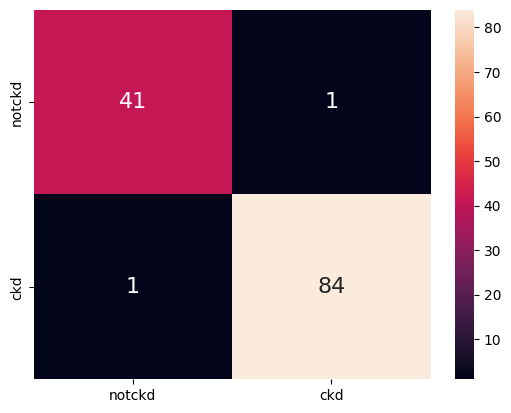

In [70]:
N_ARVORES = 50
N_JOBS = 1

modelo_rf = RandomForestClassifier(    
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,)

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)


df_conf = pd.DataFrame(matriz_conf, ["notckd", "ckd"], ["notckd", "ckd"])

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

accuracy_RF = accuracy_score(y_verdadeiro, y_previsao)
print(f'Acurácia de {round(accuracy_RF*100,3)}% no modelo floresta aleatória')

A célula abaixo serve como input para os dados do paciente. Os dados do paciente são salvos em um dicionário e este tem os valores numéricos convertidos para uma lista, a qual é reformulada apenas para ficar em 2D e ser submetida no modelo. A partir do resultado, é exibido se o paciente tem ou não (muito provavelmente) doença crônica renal.

In [71]:
DADOS_DO_PACIENTE = {
    'Idade': 20,  # anos
    'Pressão sanguínea(mm/Hg)': 120,  # mm/Hg
    'Glicose no Sangue': 100,  # mg/dl
    'Ureia no Sangue': 40,  # mg/dl
    'Creatinina no Sangue': 0.8,  # mg/dl
    'Sódio no Sangue': 140,  # mEq/L
    'Potássio no Sangue': 4.2,  # mEq/L
    'Hemoglobina': 13.5,  # g/dl
    'Volume de células vermelhas no sangue': 45,  # quantos % do volume total do sangue são células vermelhas
    'Contagem de glóbulos brancos': 8000,  # células/cumm
    'Contagem de glóbulos vermelhos': 5.2,  # milhões/cmm
    'Pus Cell': 0,  # 0 para normal, 1 para anormal
    'Aglomerados de Pus Cell': 0,  # 0 para não presente, 1 para presente
    'Bactéria': 0,  # Referente a infecção bacteriana, 0 para não presente, 1 para presente
    'Hipertensão': 1,  # 0 para não, 1 para sim
    'Diabetes Mellitus': 1,  # 0 para não, 1 para sim
    'Doença Arterial Coronariana': 1,  # 0 para não, 1 para sim
    'Apetite normal': 1,  # 0 para apetite anormal(muito tempo sem fome), 1 para apetite normal
    'Edema Pedal': 0,# 0 para não, 1 para sim
    'Nível normal de células vermelhas': 0,  # 0 para anormal, 1 para normal
    'Anemia': 0,  # 0 para não, 1 para sim
}

dados_para_analise = np.array(list(DADOS_DO_PACIENTE.values())).reshape(1, -1)

resultado_predicao = modelo_rf.predict(dados_para_analise)


if resultado_predicao[0] == 1:
    print("Esse paciente muito provavelmente tem doença renal crônica")  
else:
    print("Esse paciente muito provavelmente não tem doença renal crônica")  



Esse paciente muito possivelmente tem doença renal crônica
